In [1]:
!pip install autokeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 576.5/576.5 kB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.0/728.0 kB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 44.0 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: ten

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import autokeras as ak

Using TensorFlow backend


In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [13]:
clf=ak.ImageClassifier(overwrite=True, max_trials=2)
clf.fit(x_train,y_train,epochs=10)

Trial 2 Complete [01h 14m 44s]
val_loss: 0.8675902485847473

Best val_loss So Far: 0.8384288549423218
Total elapsed time: 01h 16m 16s
Epoch 1/10
1563/1563 [==============================] - 10s 5ms/step - loss: 1.3560 - accuracy: 0.5214
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0610 - accuracy: 0.6284
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9715 - accuracy: 0.6622
Epoch 4/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.9140 - accuracy: 0.6823
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8702 - accuracy: 0.6977
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8346 - accuracy: 0.7092
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8108 - accuracy: 0.7164
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7868 - accuracy: 0.7245
Epoch 9/10
1563/1563 [========================

In [14]:
model = clf.export_model()
model.save('autokeras.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
from keras.models import load_model

model = load_model('autokeras.h5')

In [18]:
# Predict with the best model.
predicted_y = clf.predict(x_test)
print(predicted_y)


# Evaluate the best model with testing data.
print(clf.evaluate(x_test, y_test))

313/313 [==============================] - 1s 3ms/step
[['3']
 ['8']
 ['1']
 ...
 ['5']
 ['4']
 ['7']]
313/313 [==============================] - 2s 5ms/step - loss: 0.8413 - accuracy: 0.7125
[0.8413088917732239, 0.7124999761581421]


In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 cast_to_float32 (CastToFlo  (None, 32, 32, 3)         0         
 at32)                                                           
                                                                 
 normalization (Normalizati  (None, 32, 32, 3)         7         
 on)                                                             
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0     

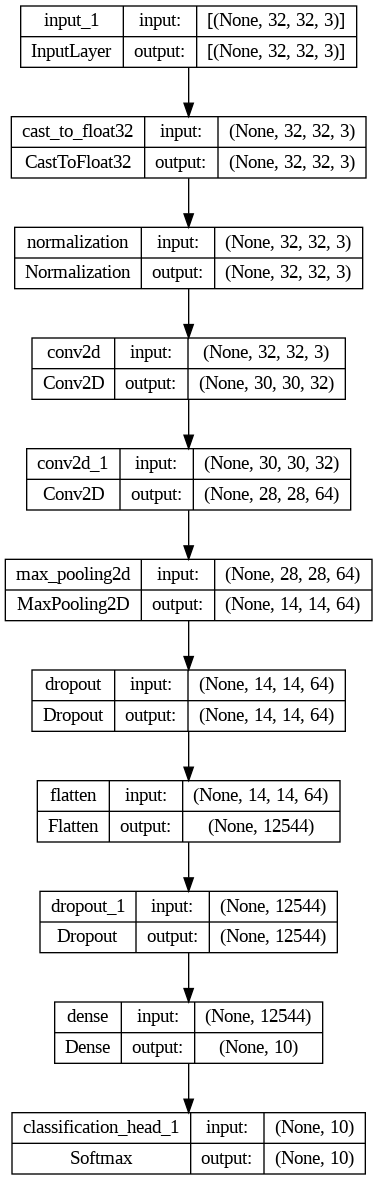

In [21]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

# Plot the model architecture
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# Display the model architecture image
Image(filename='model.png')